# ANOVA

Reference:
- https://python-graph-gallery.com/557-anova-visualization-with-matplotlib/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

## Dataset

In [2]:
sample_size = 100
group_a = np.random.normal(10, 10, sample_size)
group_b = np.random.normal(70, 10, sample_size)
group_c = np.random.normal(40, 10, sample_size)

category = ["A"] * sample_size + ["B"] * sample_size + ["C"] * sample_size
df = pd.DataFrame(
    {"value": np.concatenate([group_a, group_b, group_c]), "category": category}
)

In [3]:
group_a = df[df["category"] == "A"]["value"]
group_b = df[df["category"] == "B"]["value"]
group_c = df[df["category"] == "C"]["value"]

# Perform a paired t-test
f_stat, p_value = st.f_oneway(group_a, group_b, group_c)
print(f"f-stat: {f_stat:0.3f}")
print(f"p-value: {p_value}")

f-stat: 775.668
p-value: 1.222839766571384e-118


In [4]:
mean = df.groupby(["category"]).mean()
mean

,value
category,
A,9.944068
B,69.618688
C,42.082870


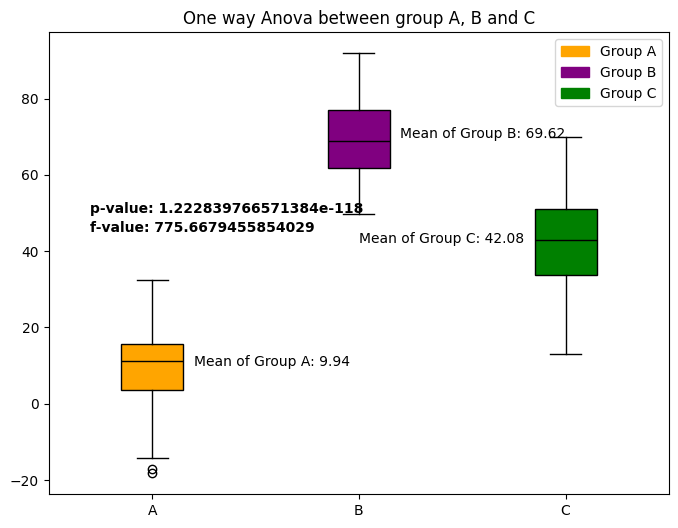

In [5]:
grouped = df.groupby("category")["value"]
fig, ax = plt.subplots(figsize=(8, 6))

boxplot = ax.boxplot(
    x=[group.values for name, group in grouped],
    tick_labels=grouped.groups.keys(),
    patch_artist=True,
    medianprops={"color": "black"},
)

colors = ["orange", "purple", "green"]
for box, color in zip(boxplot["boxes"], colors):
    box.set_facecolor(color)

# Add the p-value and the f-value
p_value_text = f"p-value: {p_value}"
ax.text(0.7, 50, p_value_text, weight="bold")

f_value_text = f"f-value: {f_stat}"
ax.text(0.7, 45, f_value_text, weight="bold")

# Add the mean for each group
ax.text(
    1.2,
    mean.loc["A"].value,
    f"Mean of Group A: {mean.loc['A'].value:0.2f}",
    fontsize=10,
)
ax.text(
    2.2,
    mean.loc["B"].value,
    f"Mean of Group B: {mean.loc['B'].value:0.2f}",
    fontsize=10,
)
ax.text(
    2, mean.loc["C"].value, f"Mean of Group C: {mean.loc['C'].value:0.2f}", fontsize=10
)

# Add a title and axis label
ax.set_title("One way Anova between group A, B and C")

# Add a legend
legend_labels = ["Group A", "Group B", "Group C"]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels);

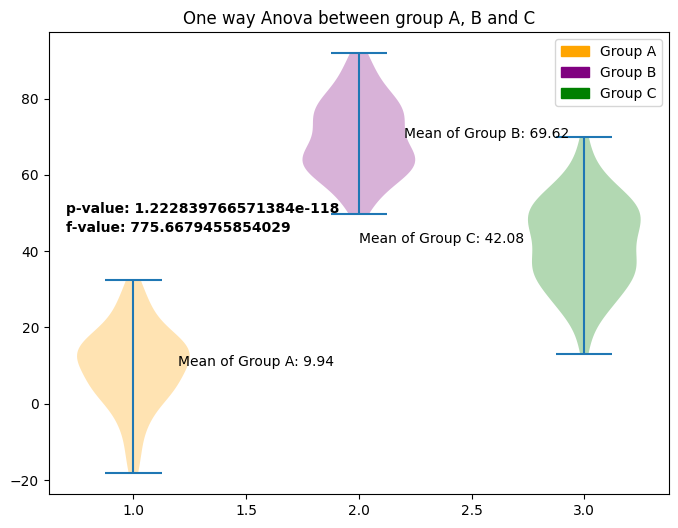

In [6]:
grouped = df.groupby("category")["value"]
fig, ax = plt.subplots(figsize=(8, 6))

violins = ax.violinplot(
    [group.values for name, group in grouped],
)

colors = ["orange", "purple", "green"]
for violin, color in zip(violins["bodies"], colors):
    violin.set_facecolor(color)

# Add the p-value and the f-value
p_value_text = f"p-value: {p_value}"
ax.text(0.7, 50, p_value_text, weight="bold")

f_value_text = f"f-value: {f_stat}"
ax.text(0.7, 45, f_value_text, weight="bold")

# Add the mean for each group
ax.text(
    1.2,
    mean.loc["A"].value,
    f"Mean of Group A: {mean.loc['A'].value:0.2f}",
    fontsize=10,
)
ax.text(
    2.2,
    mean.loc["B"].value,
    f"Mean of Group B: {mean.loc['B'].value:0.2f}",
    fontsize=10,
)
ax.text(
    2, mean.loc["C"].value, f"Mean of Group C: {mean.loc['C'].value:0.2f}", fontsize=10
)

# Add a title and axis label
ax.set_title("One way Anova between group A, B and C")

# Add a legend
legend_labels = ["Group A", "Group B", "Group C"]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels);